In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA

In [4]:
air = get_rdataset("AirPassengers").data["value"]

In [5]:
air
# monthly data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

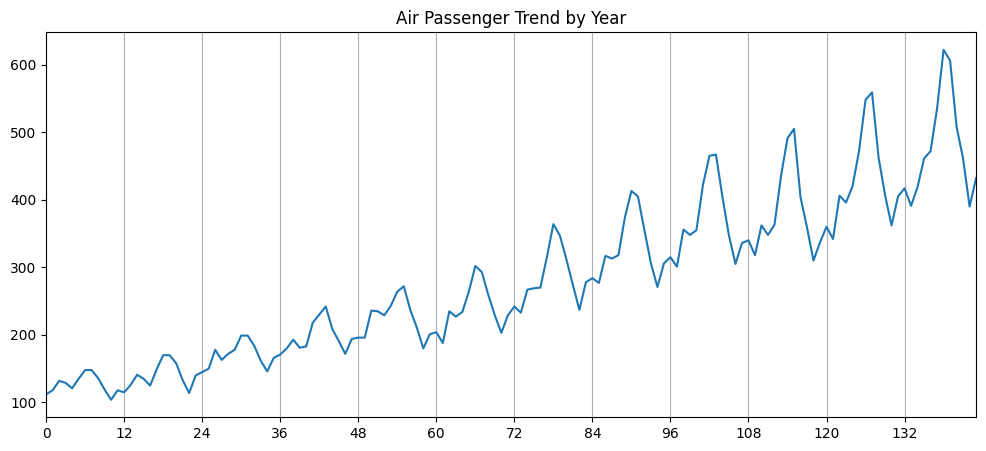

In [7]:
plt.figure(figsize=(12,5))
plt.title("Air Passenger Trend by Year")
plt.xticks(range(0,144,12))
plt.xlim(0,143)
plt.grid(axis="x")
plt.plot(air)
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal_decompose is used for date wise data and this data is month wise.

In [11]:
date = pd.date_range(start="2001-01-01",end="2013-01-01",freq="m")

In [12]:
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [14]:
df = pd.DataFrame({"Date":date, "Air":air})

In [15]:
df.head()

,Date,Air
0,2001-01-31,112
1,2001-02-28,118
2,2001-03-31,132
3,2001-04-30,129
4,2001-05-31,121


In [16]:
df.index = date

In [17]:
df.drop(columns="Date",inplace=True)

In [18]:
df.head()

,Air
2001-01-31,112
2001-02-28,118
2001-03-31,132
2001-04-30,129
2001-05-31,121


In [19]:
plot = seasonal_decompose(df)

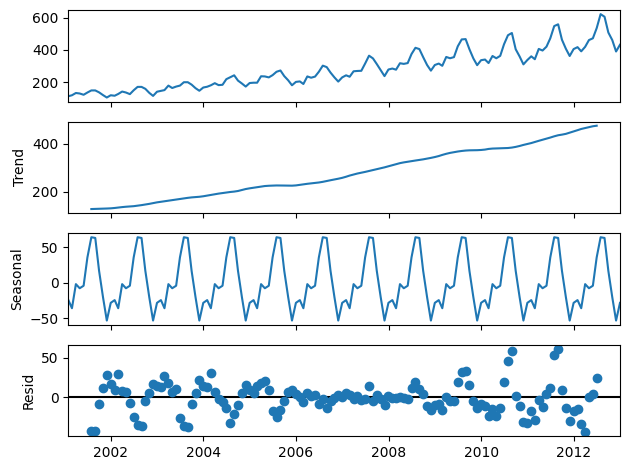

In [20]:
plot.plot();

In [22]:
best_order = (2,1,3) # P,D,Q

In [28]:
# P -> Regression on the basis of last 2 points,
# D -> Difference of error - 1 point,
# Q -> Moving Average - 3 months.
# ARIMA works on these points.

In [23]:
model = ARIMA(air, order=best_order)

In [24]:
result = model.fit()

In [25]:
months = 12

In [26]:
forecast = result.get_forecast(steps=months)

In [27]:
forecast.predicted_mean

144    482.350268
145    468.454382
146    473.694192
147    467.044390
148    470.035564
149    466.803282
150    468.452466
151    466.861137
152    467.750671
153    466.959192
154    467.432069
155    467.035260
Name: predicted_mean, dtype: float64

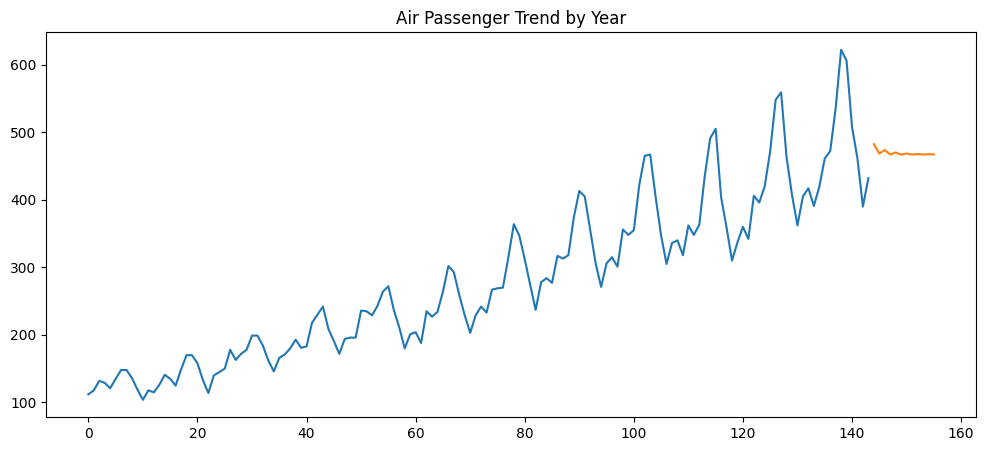

In [29]:
plt.figure(figsize=(12,5))
plt.title("Air Passenger Trend by Year")
plt.plot(air)
plt.plot(np.arange(144,156),forecast.predicted_mean)
plt.show()
# We can see there is an error (red line)

In [36]:
# To find error we use aic.
result.aic

1320.445303526492

In [37]:
best_order = None
best_aic = np.inf
# to get best result we take inf(positive infinite)

In [38]:
for p in range(5, 15):
    for d in range(2, 6):
        for q in range(8, 15):
            try:
                m=ARIMA(air, order=(p, d, q))
                result=m.fit()
                if result.aic<best_aic:
                    best_aic=result.aic
                    best_order=(p, d, q)
            except:
                print("Exception occure")
                continue
# 280 iterations (multiplication of p,d,q( diff in range 10 * 4 * 7 = 280))

Exception occure


In [39]:
best_aic
# must be less but graph is correct 

1142.6440149852933

In [40]:
best_order
# must be less but graph is correct 

(11, 2, 8)

In [47]:
model1 = ARIMA(air, order=best_order)

In [48]:
result = model1.fit()

In [57]:
forecast = result.get_forecast(steps=24)

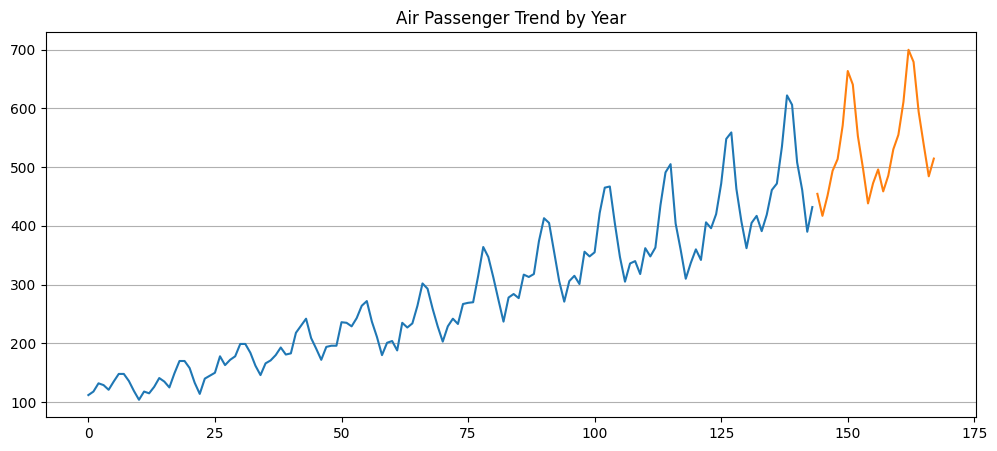

In [59]:
plt.figure(figsize=(12,5))
plt.title("Air Passenger Trend by Year")
plt.plot(air)
plt.plot(np.arange(144,168),forecast.predicted_mean)
plt.grid(axis="y")
plt.show()

In [56]:
result.aic

1142.6440149852933